In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 


In [4]:
wines_df = pd.read_csv('wines_final.csv')
wines_df.head()

,Unnamed: 0,alcohol_percent,country,discount_price,grape_variety,price,producer,product_name,wine_color,year
0,0,14.000000,Greece,45.63,Agiorgitiko,49.6,Nemeion,Igemon (1741),Red,2007
1,1,13.238695,Greece,11.13,Malagouzia,12.1,Karadimos,Malagouzia Drios Karadimou (2915),White,2017
2,2,14.000000,Greece,25.12,Syrah,27.3,Avantis,Freedom (3929),Red,2016
3,3,13.500000,Greece,13.95,Cabernet Franc,15.5,Porto Carras,Chateau Porto Carras (472),Red,2010
4,4,13.500000,Greece,8.55,Athiri,9.5,Porto Carras,Melissanthi (467),White,2018


In [7]:
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 11 columns):
Unnamed: 0         470 non-null int64
alcohol_percent    470 non-null float64
country            470 non-null object
discount_price     470 non-null float64
grape_variety      470 non-null object
price              470 non-null float64
producer           470 non-null object
product_name       470 non-null object
wine_color         470 non-null object
year               470 non-null int64
discount_diff      470 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 40.5+ KB


In [26]:
wines_df.describe(include='all')

,Unnamed: 0,alcohol_percent,country,discount_price,grape_variety,price,producer,product_name,wine_color,year,discount_diff
count,470.000000,470.000000,470,470.000000,470,470.000000,470,470,470,470.000000,470.000000
unique,NaN,NaN,14,NaN,69,NaN,67,470,4,NaN,NaN
top,NaN,NaN,Greece,NaN,Sauvignon Blanc,NaN,Unkwon Producer,Rioja Reserva Viña Ardanza 2009 La Rioja Alta,Red,NaN,NaN
freq,NaN,NaN,290,NaN,44,NaN,180,1,267,NaN,NaN
mean,123.436170,13.238695,NaN,13.885979,NaN,15.688915,NaN,NaN,NaN,2015.529787,1.802936
std,78.012978,0.889524,NaN,9.185722,NaN,9.921796,NaN,NaN,NaN,3.257624,1.172236
min,0.000000,9.000000,NaN,4.770000,NaN,5.300000,NaN,NaN,NaN,2000.000000,0.480000
25%,58.250000,13.000000,NaN,8.732500,NaN,9.990000,NaN,NaN,NaN,2015.000000,1.000000
50%,117.000000,13.238695,NaN,10.990000,NaN,12.990000,NaN,NaN,NaN,2017.000000,1.415000
75%,175.750000,14.000000,NaN,15.972500,NaN,17.600000,NaN,NaN,NaN,2018.000000,2.000000


In [6]:
wines_df["discount_diff"]=wines_df.price - wines_df.discount_price

In [8]:
wines_df.head()

,Unnamed: 0,alcohol_percent,country,discount_price,grape_variety,price,producer,product_name,wine_color,year,discount_diff
0,0,14.000000,Greece,45.63,Agiorgitiko,49.6,Nemeion,Igemon (1741),Red,2007,3.97
1,1,13.238695,Greece,11.13,Malagouzia,12.1,Karadimos,Malagouzia Drios Karadimou (2915),White,2017,0.97
2,2,14.000000,Greece,25.12,Syrah,27.3,Avantis,Freedom (3929),Red,2016,2.18
3,3,13.500000,Greece,13.95,Cabernet Franc,15.5,Porto Carras,Chateau Porto Carras (472),Red,2010,1.55
4,4,13.500000,Greece,8.55,Athiri,9.5,Porto Carras,Melissanthi (467),White,2018,0.95


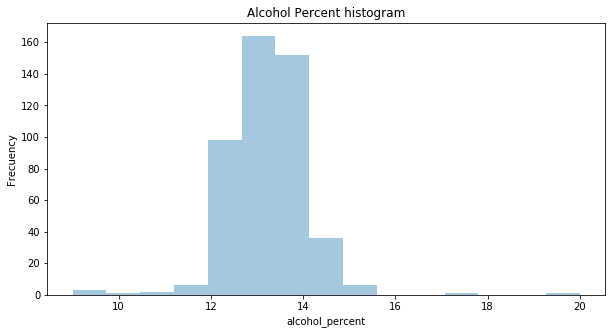

In [44]:
plt.figure(figsize=(10,5))
sns.distplot(wines_df.alcohol_percent,kde=False,bins=15)
plt.title("Alcohol Percent histogram")
plt.ylabel('Frecuency');

## Frecuencia del procentaje de alcohol 
En la figura de arriba podemos observar que la mayoria de los vinos (casi 160 del total) 
tienen entre 12 y 14 % de alcohol 

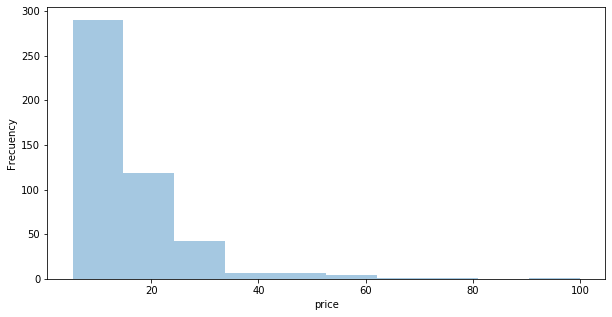

In [47]:
plt.figure(figsize=(10,5))
sns.distplot(wines_df.price,kde=False,bins=10)
plt.ylabel('Frecuency');

## Frecuencia del precio 
En la figura de arriba podemos observar que la mayoria de los vinos (casi 400 del total) 
tienen un costo entre 10 y 20 Euros, siendo unos pocos los que son mayores a 80 euros

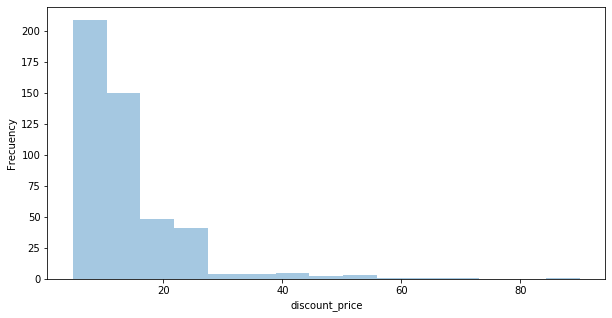

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(wines_df.discount_price,kde=False,bins=15)
plt.ylabel('Frecuency');

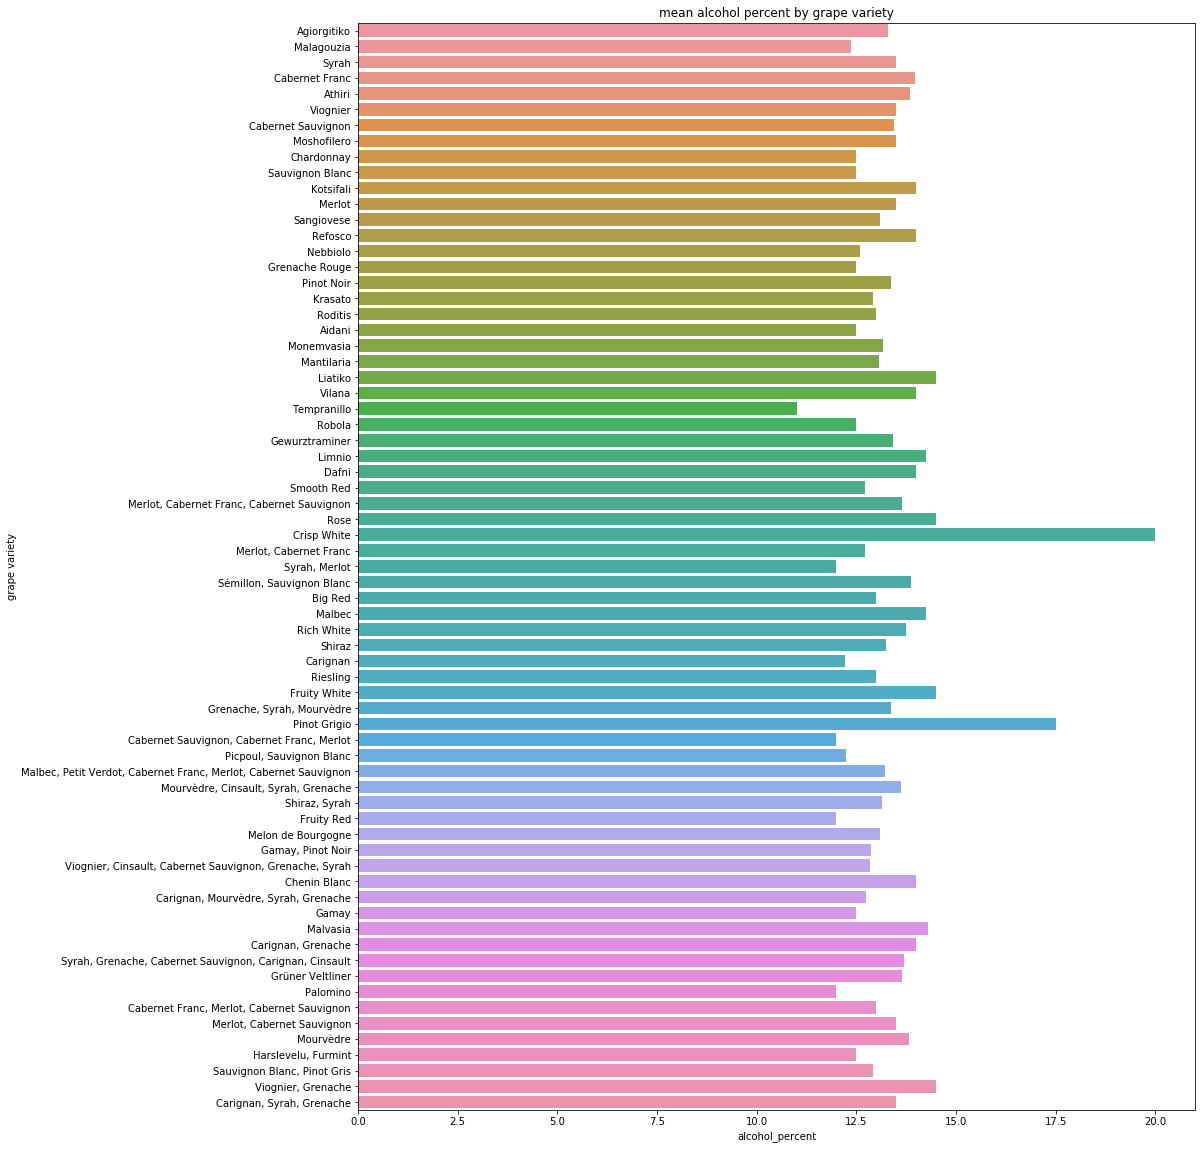

In [48]:
plt.figure(figsize=(15,20))
sns.barplot(x=wines_df.groupby(['grape_variety']).alcohol_percent.mean(),y=wines_df.grape_variety.unique() ,orient='h')
plt.ylabel("grape variety")
plt.title("mean alcohol percent by grape variety");

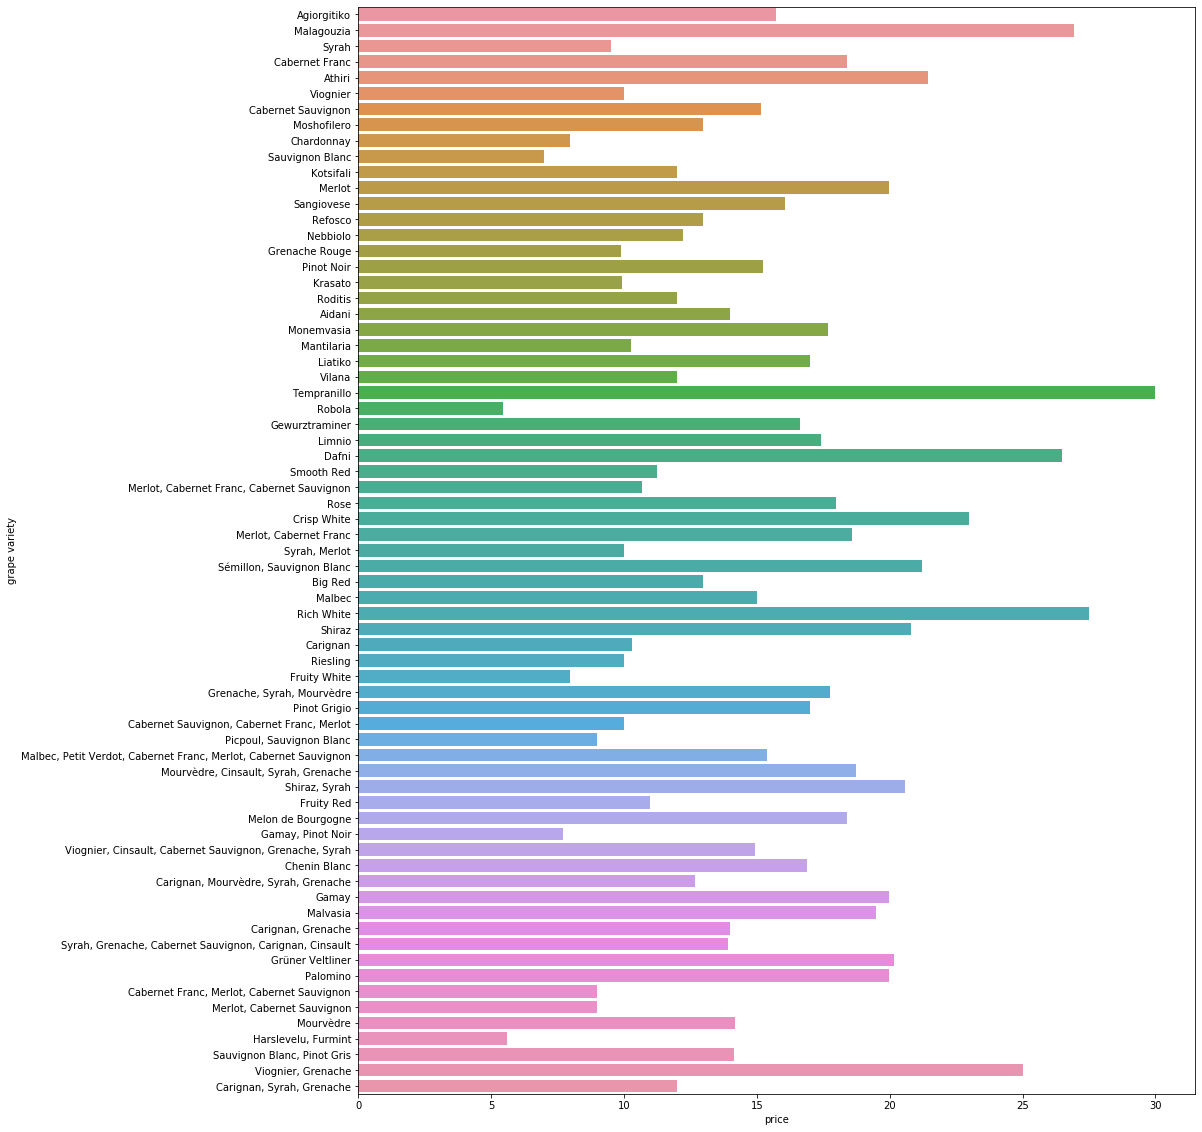

In [38]:
plt.figure(figsize=(15,20))
sns.barplot(x=wines_df.groupby(['grape_variety']).price.mean(),y=wines_df.grape_variety.unique() ,orient='h')
plt.ylabel("grape variety");

## Precio promedio por variedad de Uva 
En la figura anterior podemos observar el precio promedio por variedad de Uva del vino
De lo anterior se deduce que la variedad tempranillo es la que tiene mayor precio
En cambio las variedades con menor precio son Robola y Harslevelu, Forming

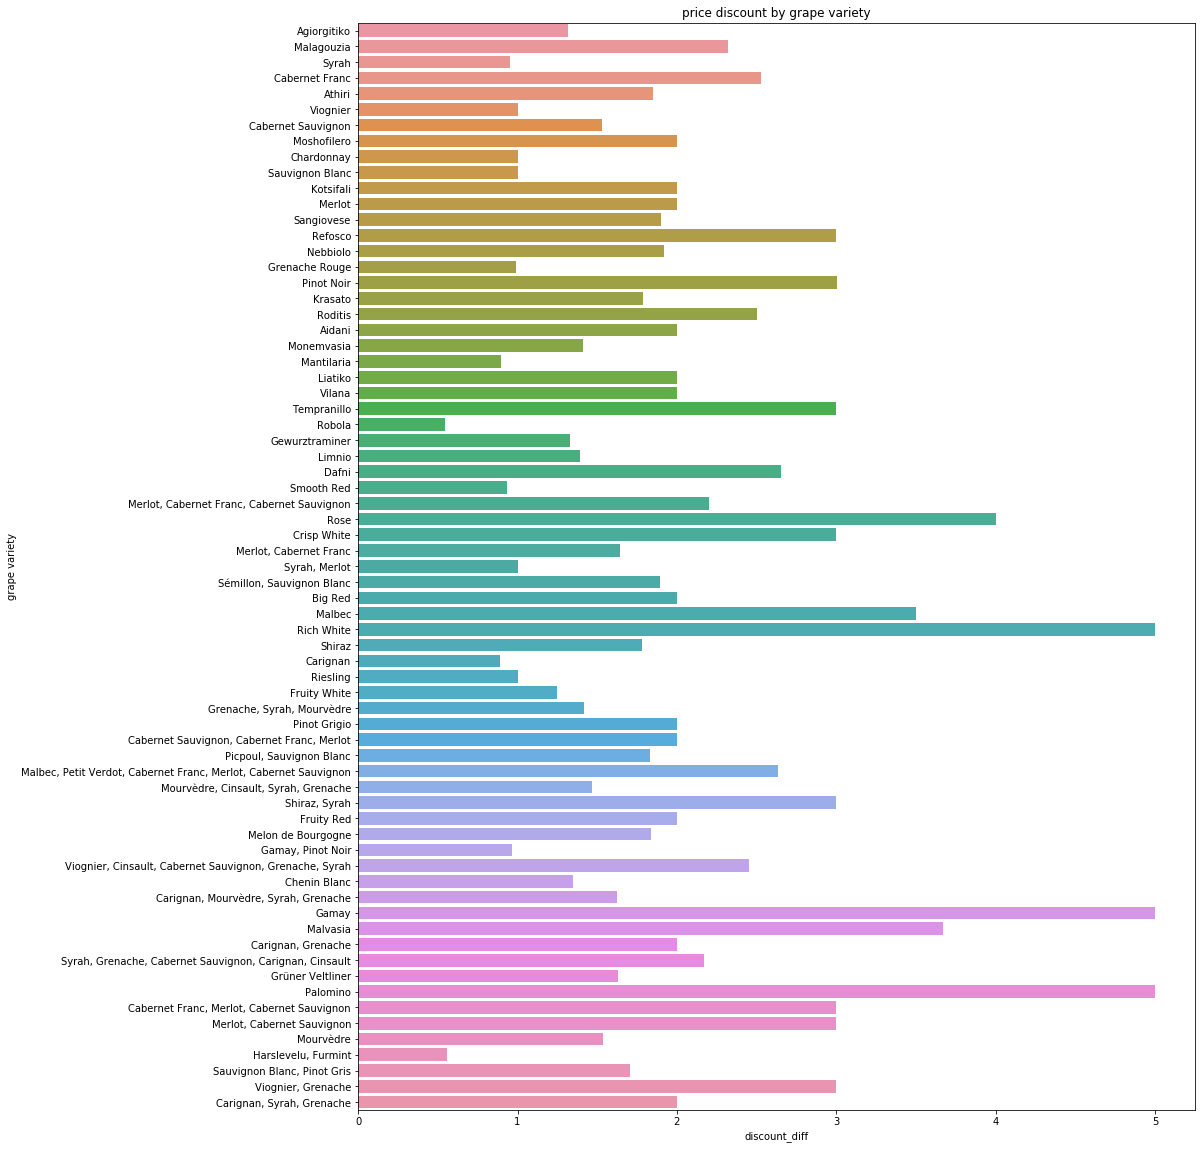

In [51]:
plt.figure(figsize=(15,20))
sns.barplot(x=wines_df.groupby(['grape_variety']).discount_diff.mean(),y=wines_df.grape_variety.unique() ,orient='h')
plt.title("price discount by grape variety")
plt.ylabel("grape variety");

## descuento con descuento promedio por variedad de Uva 
En la figura anterior podemos observar el descuento promedio por variedad de Uva del vino
De lo anterior se deduce que las  variedade  Rich White, Gamey y palomino son las que tienen mayor descuento
En cambio las variedades con menor descuento son Robola y Harslevelu, Forming



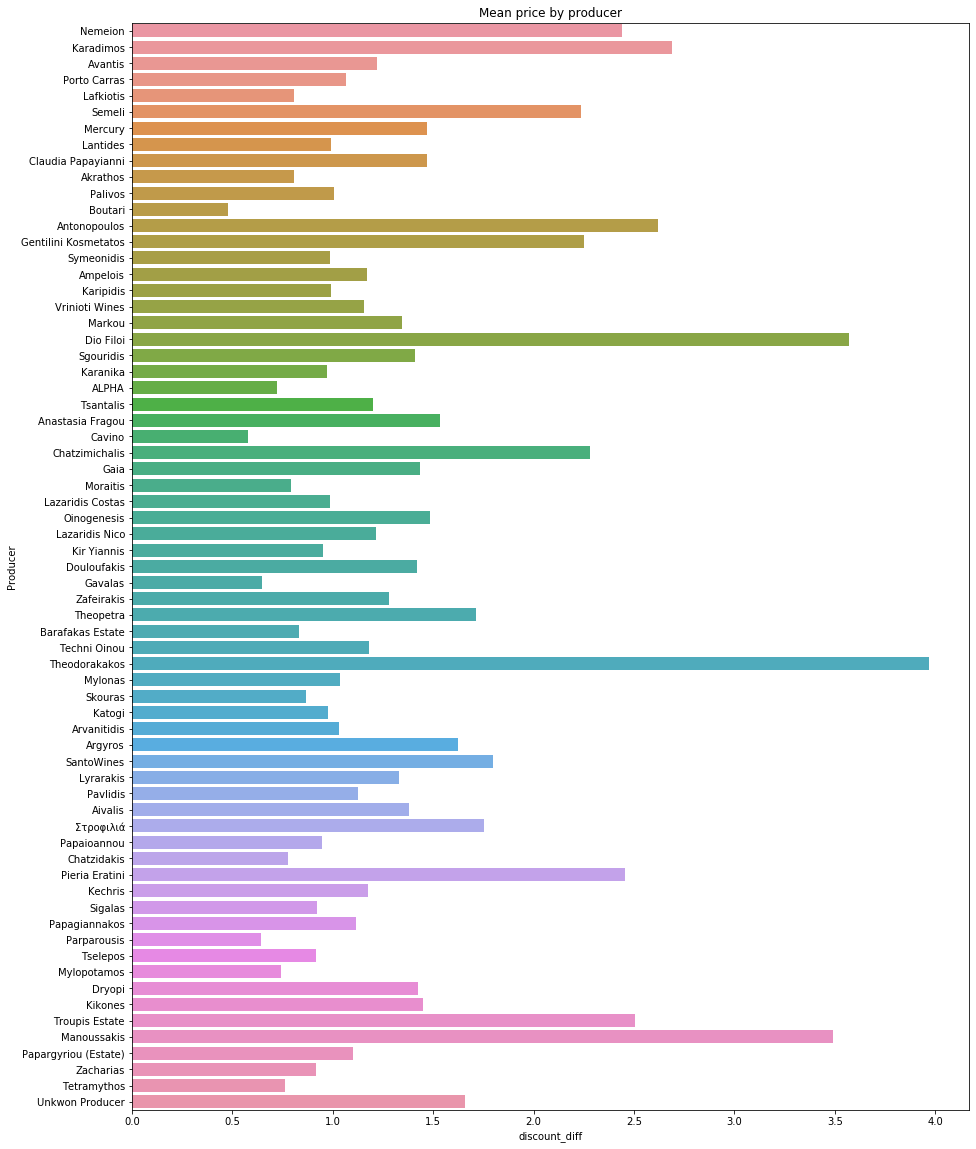

In [53]:
plt.figure(figsize=(15,20))
sns.barplot(x=wines_df.groupby(['producer']).discount_diff.mean(),y=wines_df.producer.unique() ,orient='h')
plt.title("Mean discount by producer")
plt.ylabel("Producer");

## descuento promedio por productor
En la figura anterior podemos obsevar el descuento promedio por cada uno de los productores de vinos 
siendo Theodorakakus con mayor descuento entre los productores de vino 


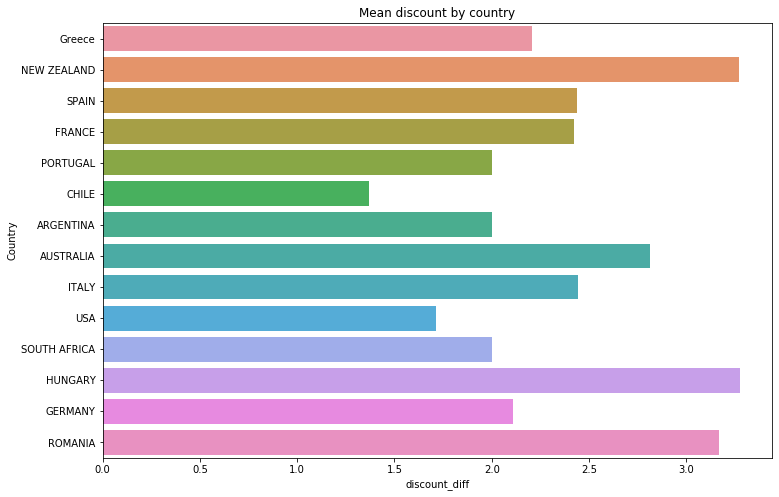

In [72]:
plt.figure(figsize=(12,8))
sns.barplot(x=wines_df.groupby(['country']).discount_diff.mean(),y=wines_df.country.unique() ,orient='h')

plt.title("Mean discount by country",)
plt.ylabel("Country");

## Descuento promedio por país de origen
En la figura anterior se puede observar el descuento promedio por país de origen de cada vino 
Se deduce que aquellos vinos procedentes de Hungria, Romania y Nueva Zelanda son aquellos que tiene mayor descuento 
Mientras que aquellos vinos procedecentes de Chile tienen menor descuento en los precios

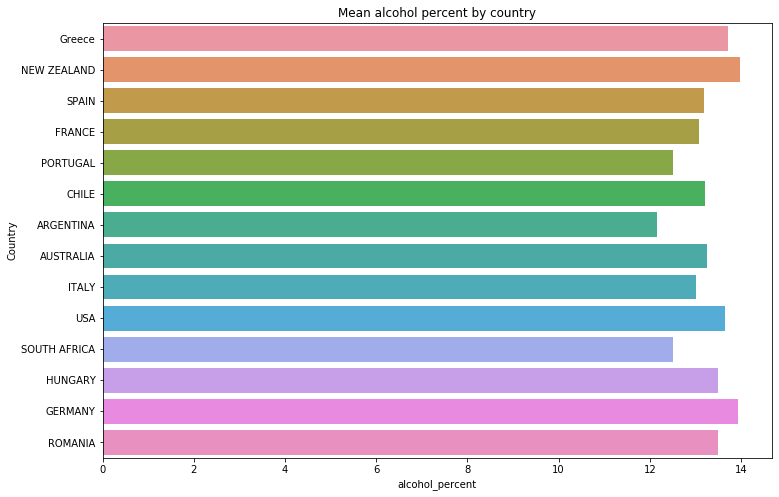

In [73]:
plt.figure(figsize=(12,8))
sns.barplot(x=wines_df.groupby(['country']).alcohol_percent.mean(),y=wines_df.country.unique() ,orient='h')
plt.title("Mean alcohol percent by country")
plt.ylabel("Country");

## Porcentaje de Alcohol por país de origen
En la figura anterior se puede observar que todos los vinos de los diferentes paises tiene un promedio de 
alcohol entre 12 y 14 %

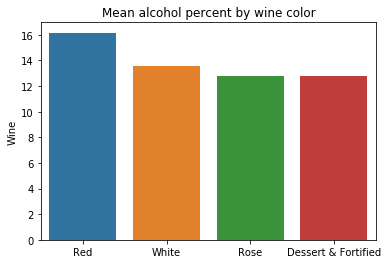

In [64]:
#plt.figure(figsize=(4,6))
sns.barplot(x=wines_df.wine_color.unique(),y=  wines_df.groupby(['wine_color']).alcohol_percent.mean())
plt.title("Mean alcohol percent by wine color")
plt.ylabel("Wine");

## Promedio de alcohol por variedad de vino 
De la imagen anterior se deduce que aquellos vinos de color rojo (Red) tienen mayor porcentaje de alcohol con un promedio de 16 %B